<a href="https://colab.research.google.com/github/Sourav-Manik/Data-Science-Assignment/blob/main/Assignment_16_Gas_Turbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('gas_turbines.csv')
print(data.shape)
data.head(5)

(15039, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [5]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f281f9cc850>,
      dtype=object)

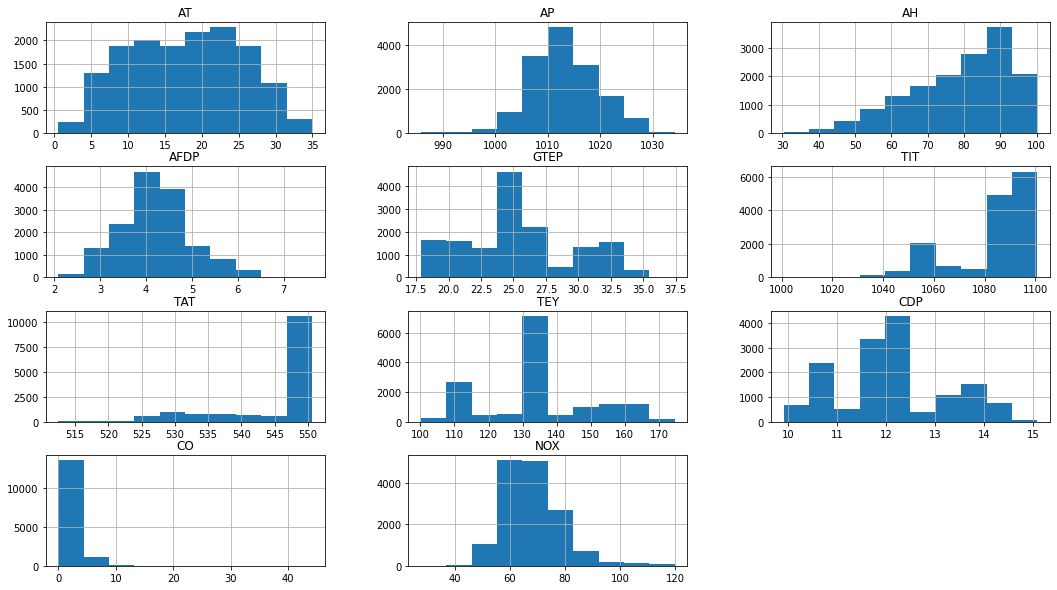

In [6]:
data.hist(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'], figsize=(18,10))

In [7]:
X = data.drop('TEY',axis=1)
y = data['TEY']

In [8]:
X.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [9]:
y.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

In [10]:
#Splitting data to training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [11]:
#Standarization of data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from numpy.random import seed
import tensorflow 
from keras.models import Sequential
from keras.layers import Activation, Dense,Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [12]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[-1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10527, 10)
(10527,)
(4512, 10)
(4512,)


In [14]:
#Model 
model = create_model()

In [15]:
#Training The Model
model.compile(
    optimizer=tensorflow.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [16]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
264/264 [==============================] - 2s 2ms/step - loss: 133.1700 - val_loss: 133.5386
Epoch 2/100
264/264 [==============================] - 0s 2ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 5/100
264/264 [==============================] - 0s 2ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 133.1514 - val_loss: 133.5386
Epoch 8/100
264/264 [==============================] - 0s 2ms/step - loss: 133.1513 - val_loss: 133.5386
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 133.1513 - val_loss: 133.5386
Epoch 10/100
264/264 [==============================] -

In [17]:
test = model.fit(X_test, y_test, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [18]:
training_df = pd.DataFrame(training.history)
print(training_df.head())

         loss   val_loss
0  133.169968  133.53862
1  133.151398  133.53862
2  133.151398  133.53862
3  133.151398  133.53862
4  133.151428  133.53862


In [19]:
test_df = pd.DataFrame(test.history)
print(test_df.head())

         loss    val_loss
0  133.159958  132.831589
1  133.159943  132.831589
2  133.160004  132.831589
3  133.159988  132.831589
4  133.160019  132.831589
